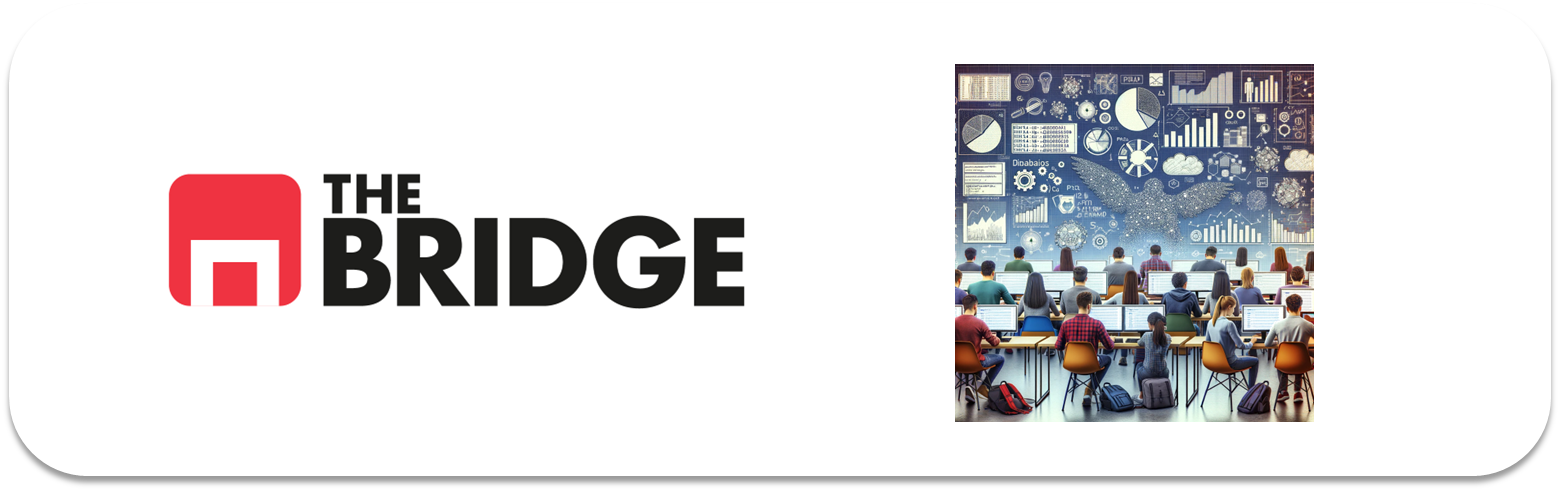

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descargar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [82]:
import pandas as pd
import seaborn as sns

In [83]:
# 1- Carga de datos
df = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv', sep='|')

<Axes: >

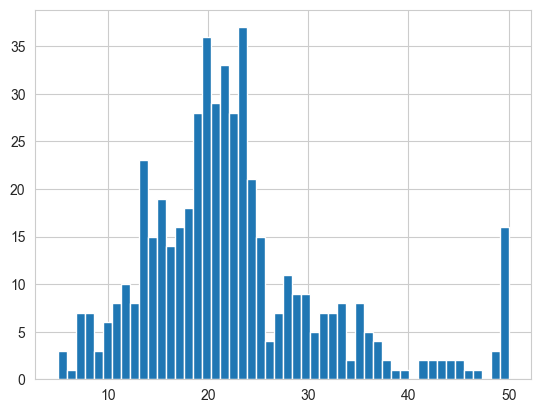

In [84]:
# 2- Target
target = 'MEDV'
df[target].hist(bins=50)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [86]:
# 3 y 4 - separar y construir las parejas X, y  de train y test. Escogemos un split 80/20
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
print(X.shape)
print(y.shape)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(506, 12)
(506,)
(404, 12) (102, 12)
(404,) (102,)


<Axes: >

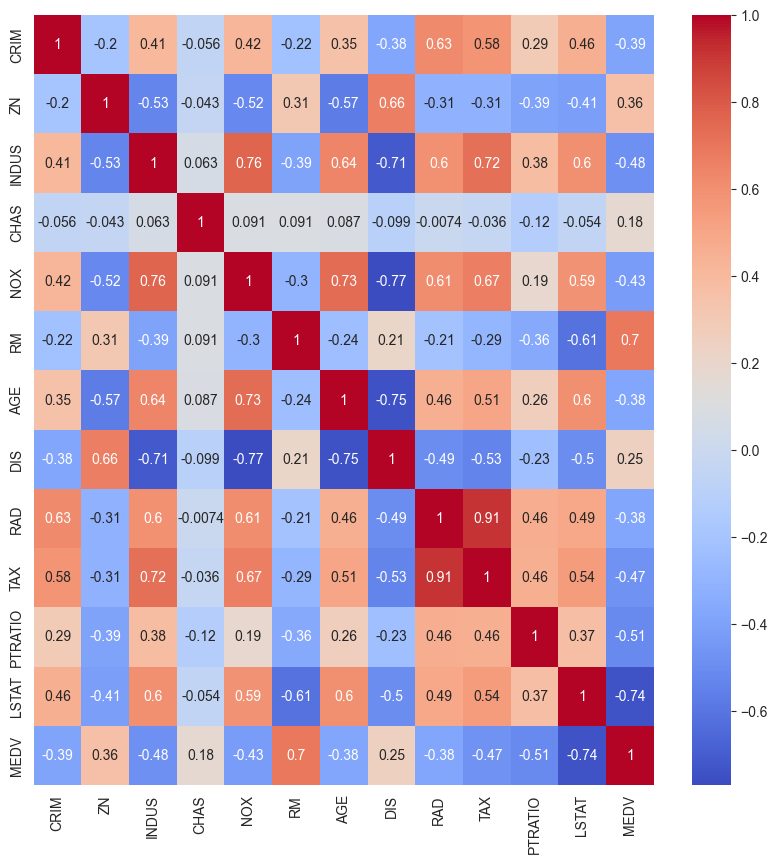

In [88]:
# 5 - Mini-EDA
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [89]:
# En vista del mapa de calor, vamos a eliminar las variables CHAS y DIS. CHAS parece tener escasa relación lineal con el precio, y DIS también tiene pobre relación, además de que puede estar en cierta parte mitigada por la variable RAD
X_train.drop(['CHAS', 'DIS'], axis=1, inplace=True)
X_test.drop(['CHAS', 'DIS'], axis=1, inplace=True)

In [90]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

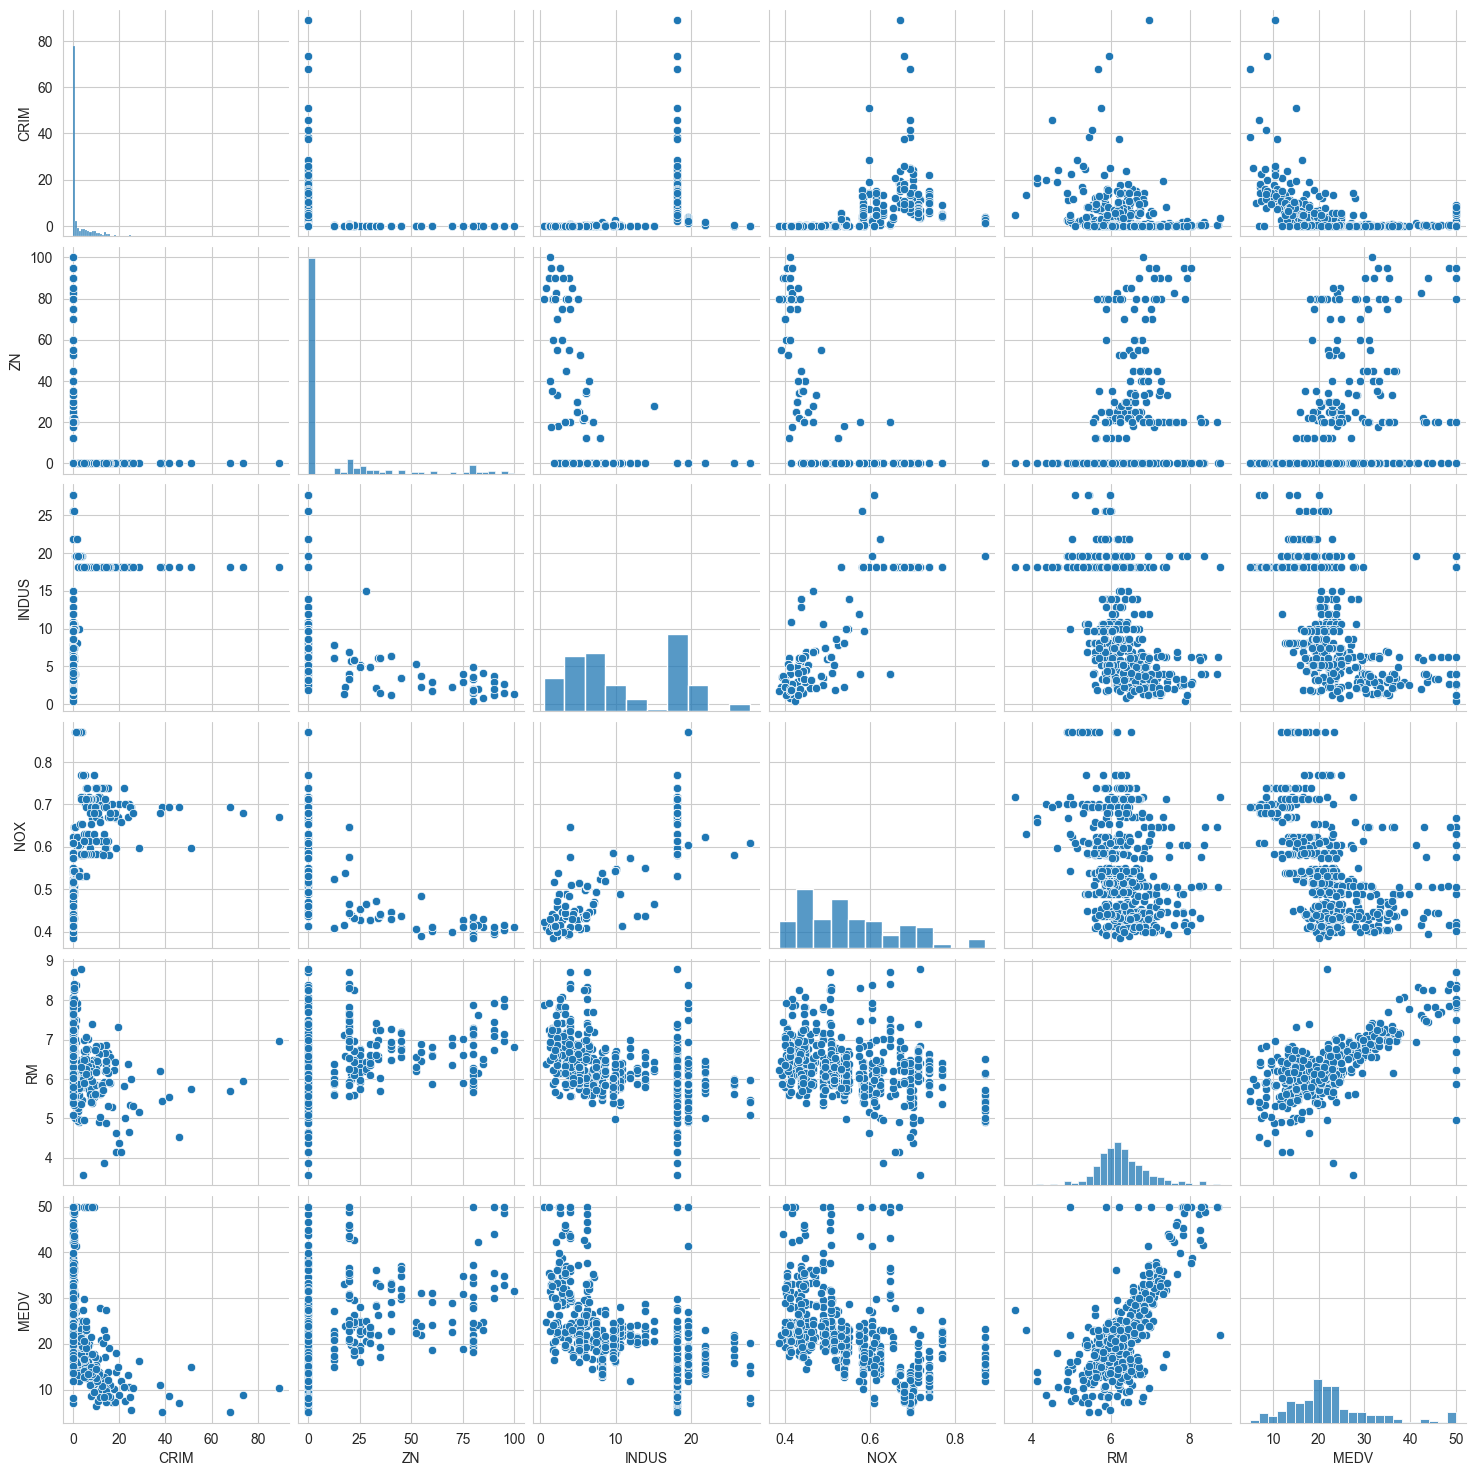

In [91]:
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'MEDV']])

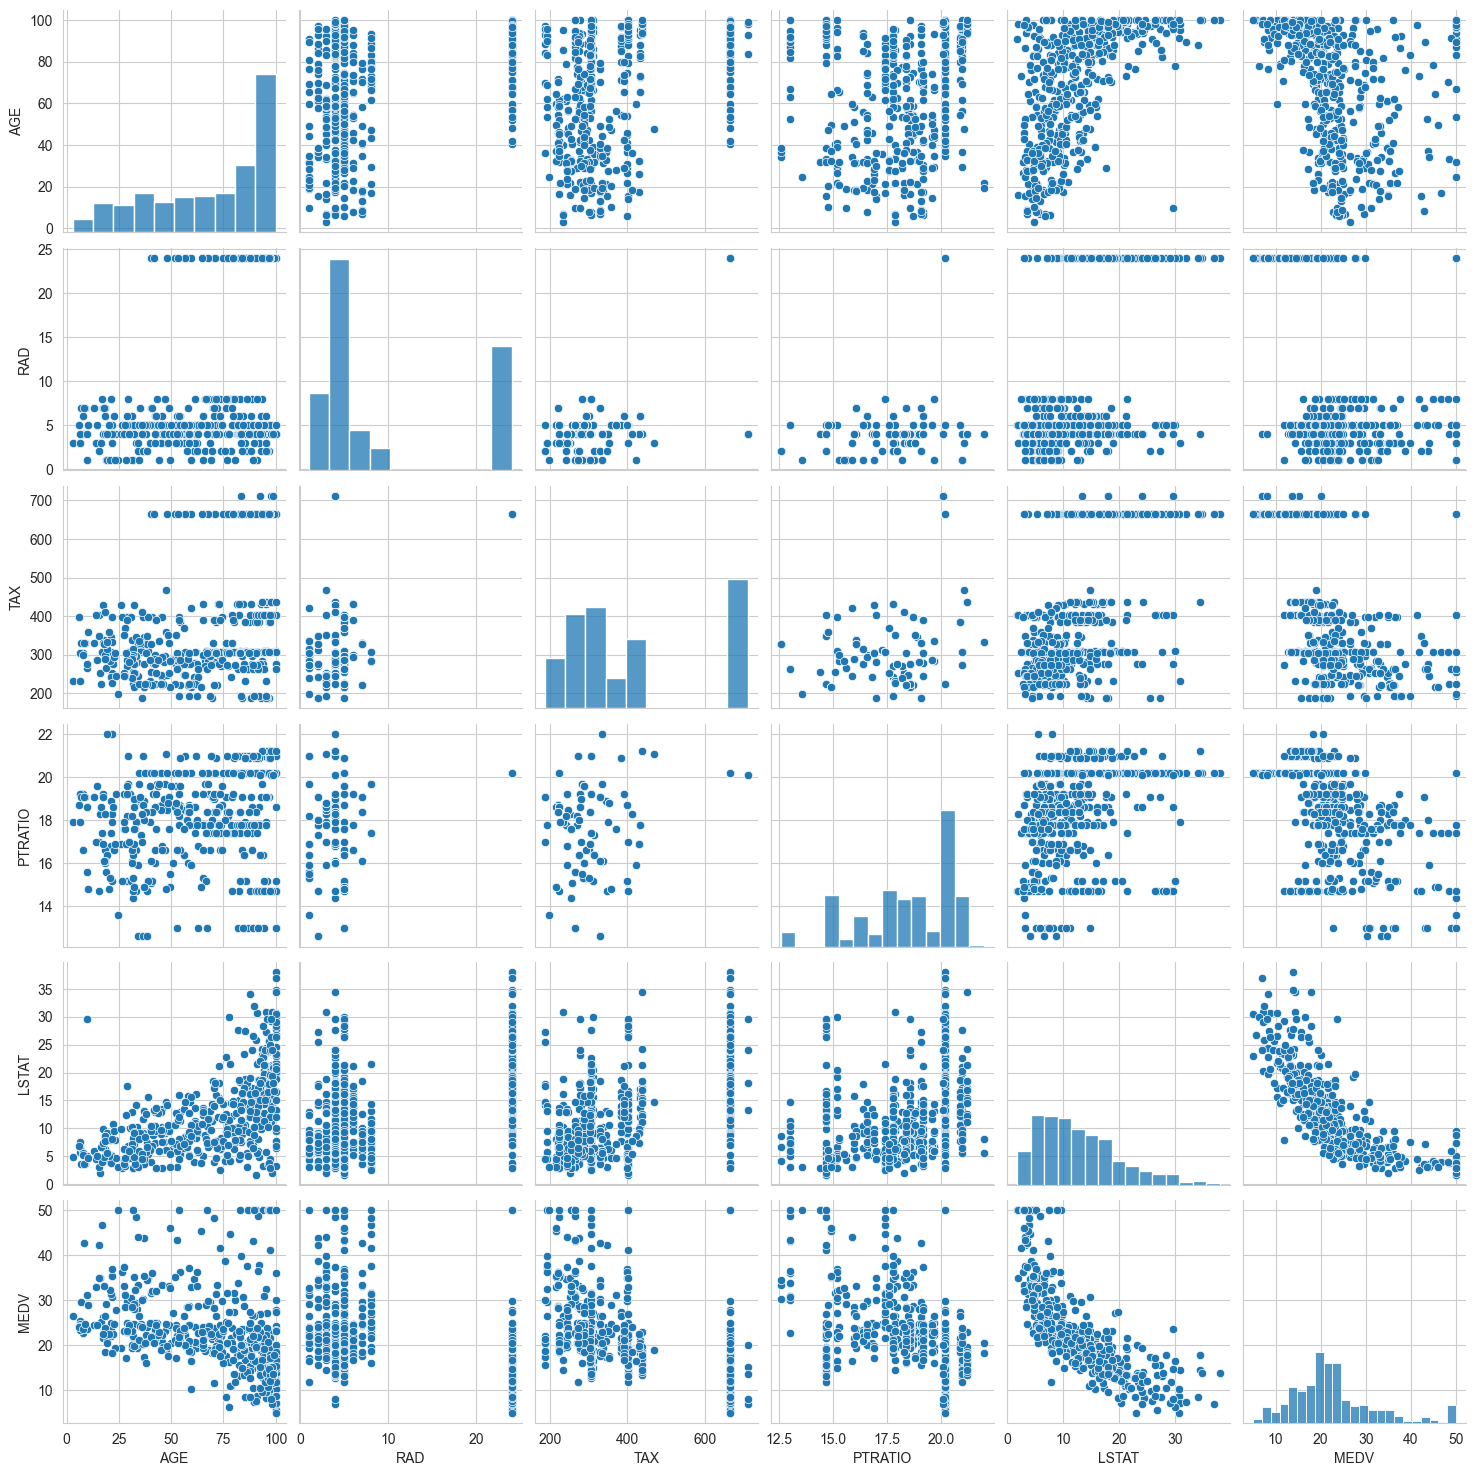

In [92]:
sns.pairplot(df[['AGE', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV']])

In [93]:
# Parece que RAD y TAX están capados por los valores más altos. Las vemos con más detenimiento
df.RAD.value_counts(ascending=False)

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: count, dtype: int64

In [94]:
df.TAX.value_counts(ascending=False)

TAX
666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
244.0      1
280.0      1
351.0      1
422.0      1
187.0      1
Name: count, Length: 66, dtype: int64

In [95]:
# Vemos si esas 132 líneas son las mismas en ambas variables
df[df.RAD == 24.0].equals(df[df.TAX == 666.0])

True

In [96]:
# Esto explica la alta colinealidad entre las variables. Como una categorización no tendría sentido y no parece que esos valores vengan con las características de las variables, 
# vamos a optar por no incluirlas en al modelo
X_train.drop(['RAD', 'TAX'], axis=1, inplace=True)
X_test.drop(['RAD', 'TAX'], axis=1, inplace=True)

In [97]:
# 6 - Trata las variables numéricas para que funcionen mejor
# Al resto de variables les vamos a ver la distribución para saber cómo tratarlas
from bootcampviztools import *

(8, 2)


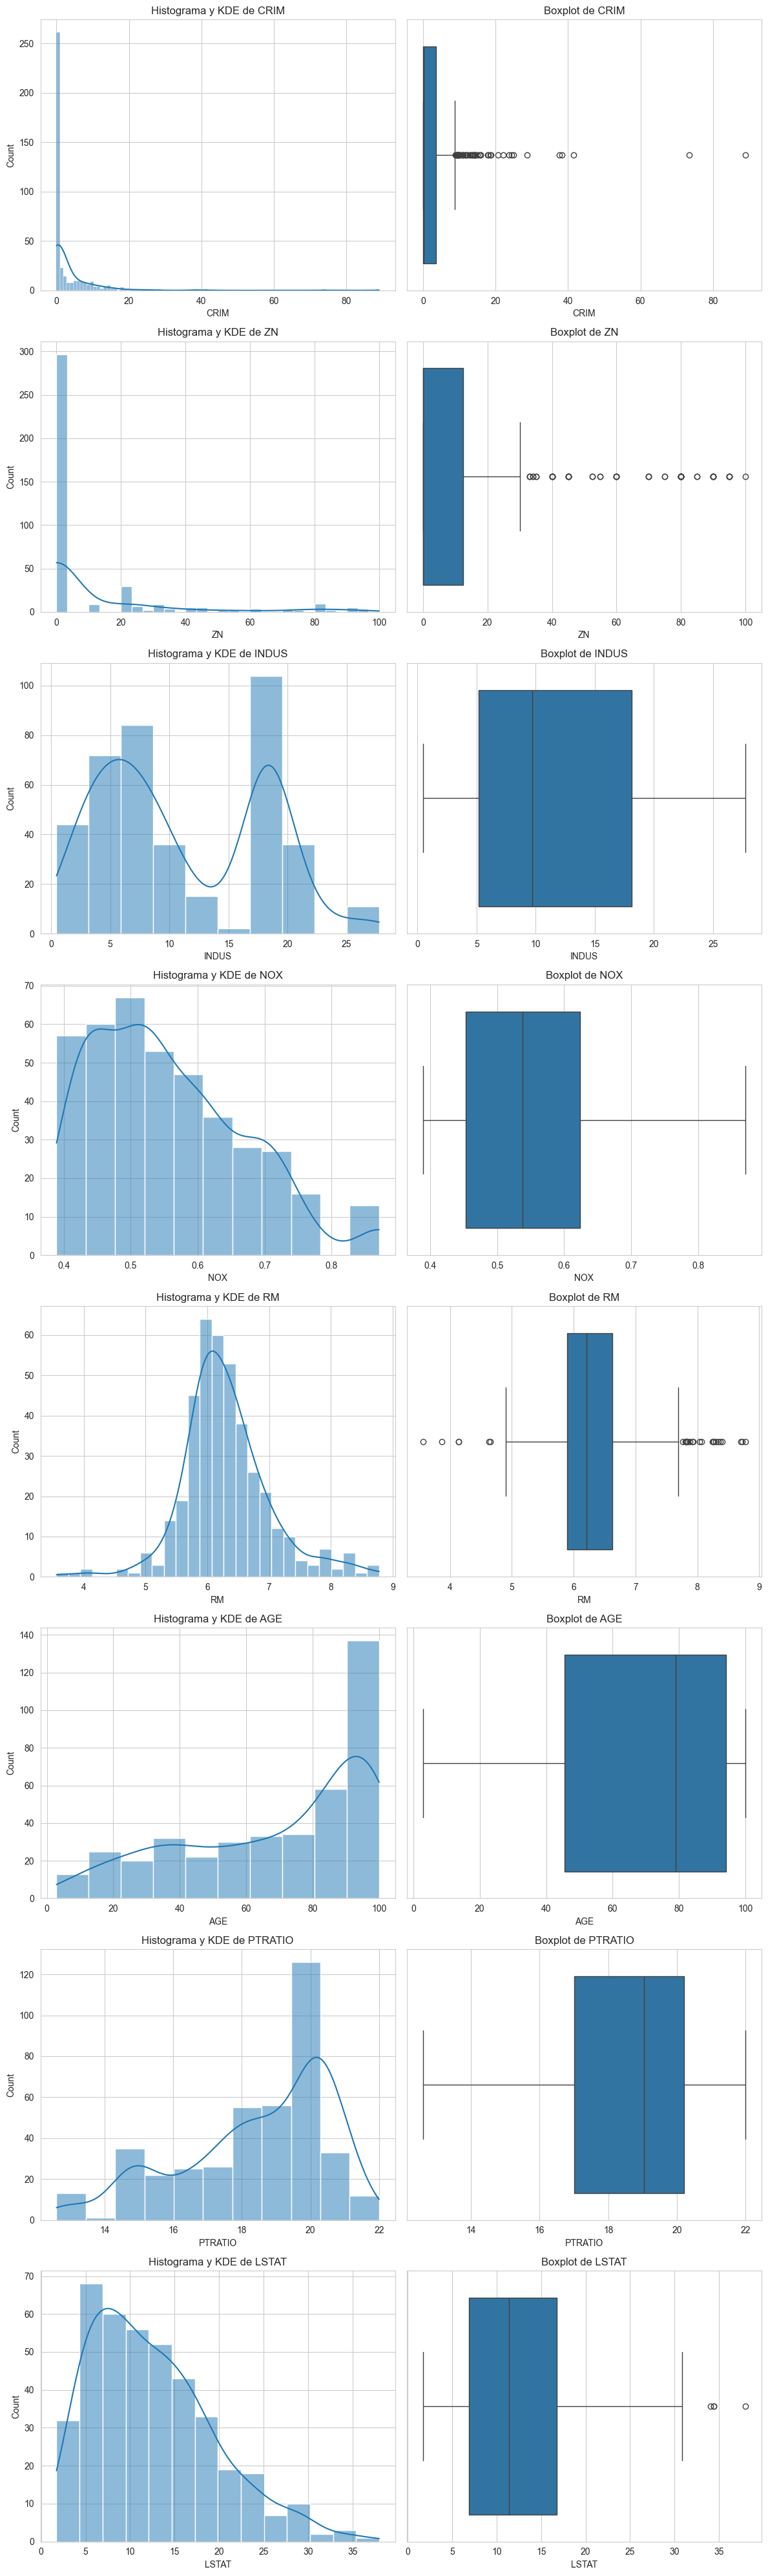

In [98]:
sns.set_style('whitegrid')
plot_combined_graphs(X_train, X_train.columns)

In [99]:
# Excepto INDUS y RM, las variables presentan unas curvas muy desplazadas hacia derecha o idquierda, por lo que les vamos a aplicar el logaritmo
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT'], dtype='object')

In [100]:
for col in ['CRIM', 'ZN', 'NOX', 'AGE', 'PTRATIO', 'LSTAT']:
    X_train[f"log_{col}"] = X_train[col].apply(np.log1p)

In [101]:
# Además, observamos que se mueven entre rangos de valores muy disntitos, así que también las vamos a escalar
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

In [102]:
for col in ['CRIM', 'ZN', 'NOX', 'AGE', 'PTRATIO', 'LSTAT']:
    X_train[col] = min_max_scaler.fit_transform(X_train[[f"log_{col}"]])

X_train['INDUS'] = min_max_scaler.fit_transform(X_train[['INDUS']])
X_train['RM'] = min_max_scaler.fit_transform(X_train[['RM']])

In [105]:
# Hacemos los mismo relativo al set de test
for col in ['CRIM', 'ZN', 'NOX', 'AGE', 'PTRATIO', 'LSTAT']:
    X_test[f"log_{col}"] = X_test[col].apply(np.log1p)

for col in ['CRIM', 'ZN', 'NOX', 'AGE', 'PTRATIO', 'LSTAT']:
    X_test[col] = min_max_scaler.fit_transform(X_test[[f"log_{col}"]])

X_test['INDUS'] = min_max_scaler.fit_transform(X_test[['INDUS']])
X_test['RM'] = min_max_scaler.fit_transform(X_test[['RM']])

In [112]:
X_train = X_train.iloc[:, :8]
X_test = X_test.iloc[:, :8]

In [106]:
# 7 - construimos el modelo
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [113]:
lm.fit(X_train, y_train)

LinearRegression()

In [116]:
lm.intercept_

np.float64(22.089693817844793)

In [117]:
# 8 - Interpretación de los pesos
features = X_train.columns.to_list()
features.insert(0, 'intercepto')

coef_values = [lm.intercept_] + list(lm.coef_)  # Lista con intercepto y coeficientes
pd.DataFrame(coef_values, index=features, columns=["Coeficiente"])

,Coeficiente
intercepto,22.089694
CRIM,0.375306
ZN,-1.196969
INDUS,0.426381
NOX,-1.886761
RM,6.829868
AGE,3.901336
PTRATIO,-4.800026
LSTAT,-15.682343


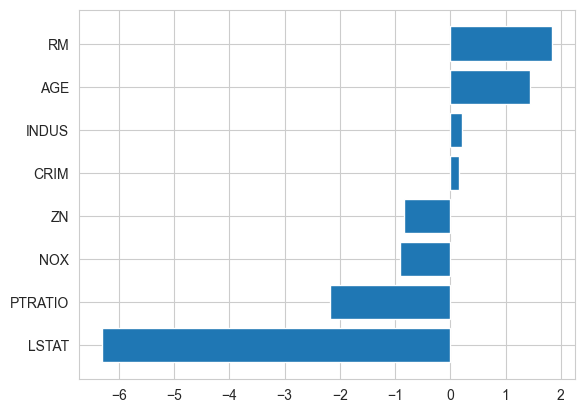

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

lm_scaled = LinearRegression()
lm_scaled.fit(X_train_scaled, y_train)
feat_coef = pd.DataFrame(lm_scaled.coef_,
                        X_train.columns, 
                        columns=['importance_standarized']).sort_values('importance_standarized',
                                                                       ascending=False)

features = feat_coef.sort_values('importance_standarized')
plt.barh(features.index,features.importance_standarized)
plt.show()

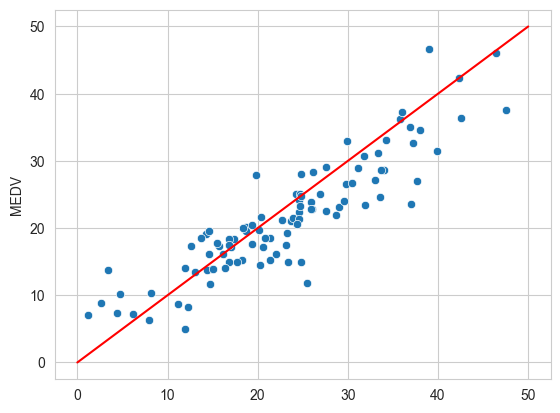

In [ ]:
# 9 - evaluación del modelo
prediccion = lm.predict(X_test)
# Comparación gráfica de las predicciones con los valores reales.
sns.scatterplot(x=prediccion, y=y_test)
plt.plot([0, 50], [0, 50], 'red')

In [120]:
# Medidas de generabilidad

from sklearn import metrics

print('Train error')
pred_train = lm.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lm.score(X_train,y_train))

print('Test error')
print('MAE test', metrics.mean_absolute_error(y_test, prediccion))
print('MSE test', metrics.mean_squared_error(y_test, prediccion))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, prediccion)))
print('R2 test', lm.score(X_test,y_test))

Train error
MAE train 3.5089837544266684
MSE train 23.42383857949327
RMSE train 4.839818031650908
R2 train 0.7315872365679656
Test error
MAE test 3.5400373349331353
MSE test 21.261998982505425
RMSE test 4.611073517360727
R2 test 0.7024985441448233


In [144]:
# 10 - Escogemos el modelo de regularización de Ridge 
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 30) 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm.predict(X_train)),3))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lm.predict(X_test)),3))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),3))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),3))

Train MSE sin regularización: 23.424
Test MSE sin regularización: 21.262
Train MSE: 28.754
Test MSE: 14.422


In [143]:
ridgeR = Ridge(alpha = 29) 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm.predict(X_train)),3))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lm.predict(X_test)),3))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),3))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),3))

Train MSE sin regularización: 23.424
Test MSE sin regularización: 21.262
Train MSE: 28.545
Test MSE: 14.424


In [150]:
ridgeR = Ridge(alpha = 29.5) 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lm.predict(X_train)),3))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lm.predict(X_test)),3))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),3))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),3))

Train MSE sin regularización: 23.424
Test MSE sin regularización: 21.262
Train MSE: 28.65
Test MSE: 14.422


#### 11 - Conclusiones
Parece que el modelo generaliza bien, ya que las métricas de train y test salen similares. Además, el MAE, que no cae apenas en el modelo de prueba, parece arrojar que no hay problema de overfitting.

El R2 del 70% (el modelo explica el 70% de la variabilidad en los datos de prueba), parece aceptable, pero quizá sería bueno tratar de aumentarlo probando otros parámetros.
También sería bueno entender mejor los valores de capado en las variables RAD, TAX, CRIM y ZN para tratarlos debidamente.

Entre los modelos sin regurlarizar y regularizado, parece aconsejable quedarse con el regularizado mediante Ridge, ya que se consigue disminuir el MSE en gran cantidad.
